# **Data Visualization**

## Objectives

* Answer business requirement 1:
    * Create a study to visually differentiate a healty and powdery mildew cherry leaves.

## Inputs

* inputs/mildew_detection_in_cherry_leaves/cherry-leaves/test.
* inputs/mildew_detection_in_cherry_leaves/cherry-leaves/train.
* inputs/mildew_detection_in_cherry_leaves/cherry-leaves/validation.

## Outputs

* Image shape embeddings pickle file. 
* Generate image montage to differentiate of healty and mildew leafs.
* Average and variablity between healty and mildew leafs.
* Generate code to answer business requirement number 1.

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 



---

## Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

## Set working directory

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection-in-cherry-leaves/jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection-in-cherry-leaves'

# Set input directories

Set train, validation and test paths.

In [5]:
my_data_dir = 'inputs/mildew_detection_in_cherry_leaves/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

---

# Set output directory

Create Output directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


### Set label names

In [7]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


---

# Data visualization

---

## Image shape

Confirm the standard image size in all datasets

Processing dataset: train
Processing dataset: test
Processing dataset: validation


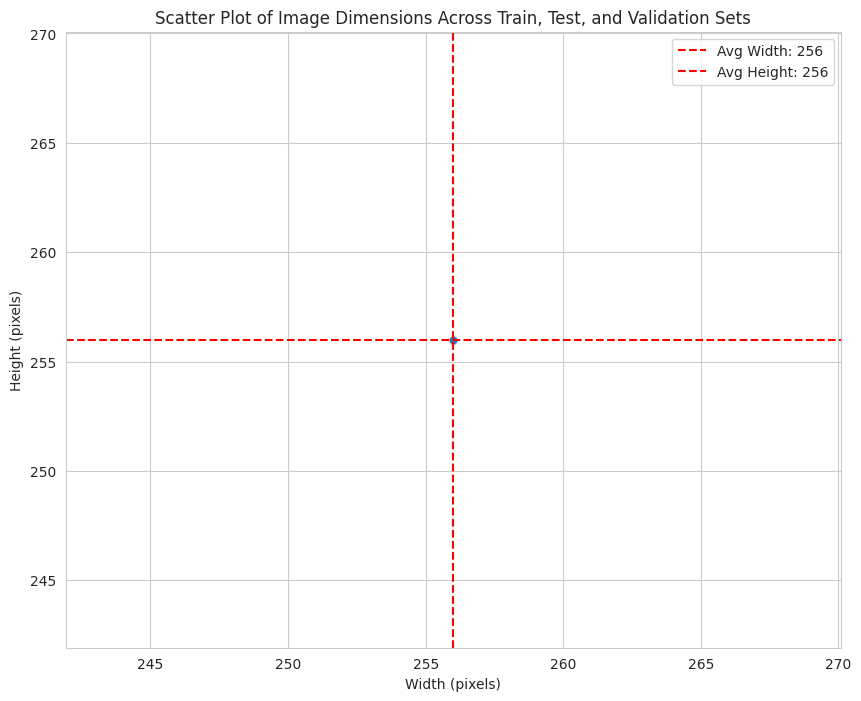

Average Width: 256 pixels
Average Height: 256 pixels


In [8]:
# Create a dictionaty with all direcories
datasets = {
    'train': train_path,
    'test': train_path,
    'validation': val_path
}

# List to store image dimensions
dim1, dim2 = [], []

# Loop through each dataset (train, test, validation)
for dataset_name, dataset_path in datasets.items():
    print(f"Processing dataset: {dataset_name}")
    
    # Loop through the labels (healthy and powdery mildew)
    labels = ['healthy', 'powdery_mildew']
    for label in labels:
        label_dir = os.path.join(dataset_path, label)
        for image_filename in os.listdir(label_dir):
            img = imread(os.path.join(label_dir, image_filename))
            d1, d2, colors = img.shape
            dim1.append(d1)  # image height
            dim2.append(d2)  # image width

# Create scatterplot of image dimensions
sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)

# Set axis labels
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")

# Compute and plot mean width and height lines
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim2_mean, color='r', linestyle='--', label=f'Avg Width: {dim2_mean}')
axes.axhline(y=dim1_mean, color='r', linestyle='--', label=f'Avg Height: {dim1_mean}')
plt.legend()

# Show the plot
plt.title("Scatter Plot of Image Dimensions Across Train, Test, and Validation Sets")
plt.show()

# Print the average dimensions
print(f"Average Width: {dim2_mean} pixels")
print(f"Average Height: {dim1_mean} pixels")

The size of the image is 256x256 pixels is to big and it may cause problems wen pushing to github after training the model. In the next notebook we will resize the images

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [9]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)


IndentationError: expected an indented block (1114530593.py, line 5)